In [2]:
import pandas as pd

# the metadata for this tutorial can be found on two csv files, metadata.csv and meta_cluster.csv
# these lines of code load and concatenate the two source files
df = pd.read_csv("metadata.csv")
df_cluster = pd.read_csv("meta_cluster.csv", dtype={'cluster_id': str})

# pd.concat() allows us concatenate the csvs using rules or logic
# in this case, axis= 0 means to join by rows instead of the columns, to sort the results, and to fill nan values with 0
# the last part is important because meta_cluster.csv has a column for cluster_id and metadata.csv does not
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
df_all = pd.concat([df,df_cluster], axis=0, ignore_index=True, sort=True).fillna('none')

# creating separate dataframes for all binary values and all non_binary values  
non_binary = df_all.query("perceived_author_gender == 'none' or perceived_author_gender == 'dual'").reset_index(drop=True)
binary = df_all.query("perceived_author_gender == 'm' or perceived_author_gender == 'f'").reset_index(drop=True)


In [3]:
binary

,cluster_id,day,month,nyt_id,nyt_pdf_endpoint,perceived_author_gender,xml_id,year
0,none,7,1,4fc0532945c1498b0d250e4c,https://timesmachine.nytimes.com/timesmachine/...,m,101702142,1905
1,none,7,1,4fc045fc45c1498b0d2162b6,https://timesmachine.nytimes.com/timesmachine/...,m,101702170,1905
2,none,7,1,4fc03b9245c1498b0d1e86ad,https://timesmachine.nytimes.com/timesmachine/...,m,101702168,1905
3,none,7,1,4fc047fa45c1498b0d21ffce,https://timesmachine.nytimes.com/timesmachine/...,m,101702081,1905
4,none,7,1,4fc03b9245c1498b0d1e86b4,https://timesmachine.nytimes.com/timesmachine/...,m,101702167,1905
...,...,...,...,...,...,...,...,...
2883,1,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,f,113314527,1920
2884,4,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,m,113314527,1920
2885,5,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,m,113314527,1920
2886,6,17,10,4fc0934a45c1498b0d37d0e6,https://timesmachine.nytimes.com/timesmachine/...,m,113314527,1920


In [4]:
# load term frequencies from csv files, convert to list of dictionaries
# loop metadata 
list_of_dictionaries = []
for row in binary.iterrows():
    if row[1]['cluster_id'] == 'none':
        # if there's no numerican cluster id, build the file name using only the folder location, the id, and '.csv'
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '.csv'])
    else:
        # if there's a numerican cluster id, build the file name with the folder location, the id, a hyphen, the cluster_id, and '.csv' number
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '-', row[1]['cluster_id'], '.csv'])
    
    # loading a csv as a pandas dataframe is often the fastest way to get data into python
    df = pd.read_csv(txt_file_name).dropna().reset_index(drop=True)
    
    # but I want a dictionary that looks like this:
    # mydict = {'the': 20,'of': 9,'and': 8,'poems': 6 ... }
    # this is a format scikit learn is designed to read
    mydict = dict(zip(list(df['term']), list(df['count'])))
    
    # list() turns each column to a list, zip() takes the two lists and makes a list of tuples, like this:
    # [('the', 20),('of', 9),('and', 8),('poems', 6) ... ]
    # and dict() converts that list of tuples to a dictionary
    
    # finally, now that I have the right format, I add this dictionary to end of my list of dictionaries
    list_of_dictionaries.append(mydict)
# len() of list_of_dictionaries will be the same as the number of reviews in binary, and the ame order
len(list_of_dictionaries)

2888

In [5]:
# here's an example I want to discuss in the lesson
list_of_dictionaries[0]

{'the': 20,
 'of': 9,
 'and': 8,
 'poems': 6,
 'from': 6,
 'are': 6,
 'each': 6,
 'to': 5,
 'in': 4,
 'volume': 4,
 'his': 4,
 'has': 4,
 'for': 4,
 's': 4,
 'work': 3,
 'british': 3,
 'poet': 3,
 'browning': 3,
 'best': 3,
 'important': 3,
 'editions': 3,
 'byron': 3,
 'given': 3,
 'these': 3,
 'poets': 3,
 'a': 3,
 'prof': 3,
 'selected': 2,
 'as': 2,
 'so': 2,
 'give': 2,
 'space': 2,
 'or': 2,
 'author': 2,
 'he': 2,
 'dates': 2,
 'not': 2,
 'shelley': 2,
 'century': 2,
 'selections': 2,
 'nineteenth': 2,
 'robert': 2,
 'wordsworth': 2,
 'standard': 2,
 'all': 2,
 'page': 2,
 'tennyson': 2,
 'coleridge': 2,
 'scott': 2,
 'rossetti': 2,
 'while': 1,
 'others': 1,
 'much': 1,
 'sonnets': 1,
 'feature': 1,
 'between': 1,
 'portuguese': 1,
 'by': 1,
 'represented': 1,
 'rank': 1,
 'one': 1,
 'brief': 1,
 'importance': 1,
 'relative': 1,
 'biography': 1,
 'with': 1,
 'correspond': 1,
 'numbering': 1,
 'other': 1,
 'at': 1,
 'principal': 1,
 'poem': 1,
 'after': 1,
 'being': 1,
 'publica

In [6]:
# import various from scikit learn
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# set up logistic regression with gender labels
v = DictVectorizer()
X = v.fit_transform(list_of_dictionaries)
tfidf = TfidfTransformer()
Z = tfidf.fit_transform(X)

# make 'true' labels
y = list(binary['perceived_author_gender'])

# convert to 0s and 1s so scikit learn can score them
y = [0 if i == 'f' else 1 for i in y]

In [7]:
# split the rows into training data, training labels, test data, and test labels
# test on 33% of the data
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.33, random_state=21)

# weight the model to expect labels that are 72% 0 and 28% 1
lr = LogisticRegression(class_weight={0:0.72, 1:0.28})

# fit the model to the training data
lr.fit(X_train, y_train)

# make label predictions
results = lr.predict(X_test)

# generate probabilities for each label
probs = lr.predict_proba(X_test)

In [8]:
# make list_of_dicts_nb 
# load term frequencies from csv files, convert to list of dictionaries
# loop metadata 
list_of_dictionaries_nb = []
for row in non_binary.iterrows():
    if row[1]['cluster_id'] == 'none':
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '.csv'])
    else:
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '-', row[1]['cluster_id'], '.csv'])
    
    df = pd.read_csv(txt_file_name).dropna().reset_index(drop=True)
    mydict = dict(zip(list(df['term']), list(df['count'])))
    list_of_dictionaries_nb.append(mydict)

len(list_of_dictionaries_nb)

330

In [9]:
# make predictions using nonbinary data 
non_binary_X = v.transform(list_of_dictionaries_nb)
non_binary_Z = tfidf.fit_transform(non_binary_X)

# generate probabilities for each label
nb_probs = lr.predict_proba(non_binary_Z)

#display the results as a pandas dataframe
results_nb = pd.DataFrame()

# make columns for the original label, the nyt_id, the cluster_id, the pdf url, and the predicted probabilities
results_nb['label'] = list(non_binary['perceived_author_gender'])
results_nb['nyt_id'] = list(non_binary['nyt_id'])
results_nb['cluster_id'] = list(non_binary['cluster_id'])
results_nb['nyt_pdf_url'] = list(non_binary['nyt_pdf_endpoint'])
results_nb['prob_f'] = [i[0] for i in nb_probs]
results_nb['prob_m'] = [i[1] for i in nb_probs]
results_nb

,label,nyt_id,cluster_id,nyt_pdf_url,prob_f,prob_m
0,none,4fc03b9245c1498b0d1e86aa,none,https://timesmachine.nytimes.com/timesmachine/...,0.345820,0.654180
1,none,4fc0532945c1498b0d250e51,none,https://timesmachine.nytimes.com/timesmachine/...,0.366564,0.633436
2,dual,4fc045fd45c1498b0d216349,none,https://timesmachine.nytimes.com/timesmachine/...,0.374119,0.625881
3,none,4fc0499e45c1498b0d226ca4,none,https://timesmachine.nytimes.com/timesmachine/...,0.463997,0.536003
4,none,4fc045fd45c1498b0d2163cd,none,https://timesmachine.nytimes.com/timesmachine/...,0.344685,0.655315
...,...,...,...,...,...,...
325,none,4fc08c7945c1498b0d35daa5,11,https://timesmachine.nytimes.com/timesmachine/...,0.957041,0.042959
326,none,4fc08c7945c1498b0d35daa5,12,https://timesmachine.nytimes.com/timesmachine/...,0.777375,0.222625
327,none,4fc078eb45c1498b0d3033cc,8,https://timesmachine.nytimes.com/timesmachine/...,0.507212,0.492788
328,none,4fc0934a45c1498b0d37d0e6,2,https://timesmachine.nytimes.com/timesmachine/...,0.717915,0.282085


In [10]:
scores = {}
# generate f1, precision, recall, and accuracy scores
# I will discuss each of these in the lesson
for y,z in [("f",0),("m",1)]:
    scores[y] = {}
    scores[y]["f1"] = f1_score(y_test, results, pos_label=z, average='binary')  
    scores[y]["precision"] = precision_score(y_test, results, pos_label=z, average='binary')
    scores[y]["recall"] = recall_score(y_test, results, pos_label=z, average='binary')
        
scores["accuracy"] = accuracy_score(y_test, results)

In [11]:
print(results_nb.loc[229]['nyt_pdf_url'])

https://timesmachine.nytimes.com/timesmachine/1905/05/27/101758576.pdf


In [12]:
# show all measures of validity
scores

{'f': {'f1': 0.7768240343347641,
  'precision': 0.7702127659574468,
  'recall': 0.7835497835497836},
 'm': {'f1': 0.9278779472954231,
  'precision': 0.9304589707927677,
  'recall': 0.9253112033195021},
 'accuracy': 0.8909853249475891}

In [13]:
df_coef = pd.DataFrame()
df_coef['term'] = v.feature_names_
df_coef['coef'] = lr.coef_[0]
df_coef = df_coef.sort_values(by='coef').reset_index(drop=True)
df_coef.head(30)

,term,coef
0,her,-5.199748
1,she,-4.365278
2,mrs,-2.253557
3,miss,-2.140135
4,women,-0.985796
5,and,-0.932006
6,woman,-0.816506
7,home,-0.613295
8,story,-0.612957
9,love,-0.611071


In [14]:
df_coef.tail(30)

,term,coef
44326,future,0.238944
44327,science,0.239222
44328,from,0.244768
44329,states,0.248344
44330,air,0.257506
44331,james,0.259510
44332,man,0.267589
44333,lie,0.275208
44334,jim,0.283012
44335,m,0.285777


In [15]:
from sklearn.linear_model import LinearRegression

# create labels for linear regression, predicting review year using term frequencies
years = list(df_all['year'])

list_of_dictionaries_linear = []

#same operation as logistic but with all reviews that have a year field
for row in df_all.iterrows():
    if row[1]['cluster_id'] == 'none':
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '.csv'])
    else:
        txt_file_name = ''.join(['term-frequency-tables/', row[1]['nyt_id'], '-', row[1]['cluster_id'], '.csv'])
    df = pd.read_csv(txt_file_name).dropna().reset_index(drop=True)
    mydict = dict(zip(list(df['term']), list(df['count'])))
    list_of_dictionaries_linear.append(mydict)

# set up linear regression with year labels
v_lin = DictVectorizer()
X_lin = v_lin.fit_transform(list_of_dictionaries_linear)
tfidf_lin = TfidfTransformer()
Z_lin = tfidf.fit_transform(X_lin)

# note that I'm using a different random state
X_train, X_test, y_train, y_test = train_test_split(Z_lin, years, test_size=0.33, random_state=12)

lr_lin = LinearRegression()

lr_lin.fit(X_train, y_train)
results_linear = lr_lin.predict(X_test)

# calculate how close or far, on average, the predictions are
differences = []
for e,i in enumerate(results_linear):
    gap = abs(i - y_test[e])
    differences.append(gap)
sum(differences)/len(differences)
#this is the mean absolute error

4.306248821183228

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score
r2_score(y_test, results_linear )
#mean_absolute_error(y_test, results_linear )
explained_variance_score(y_test, results_linear)

0.5650948161884202

In [17]:
# compare this result to random guesses between 1905 and 1925
import random
y_rand = [random.randint(1905, 1925) for i in range(len(differences))]
differences = []
for e,i in enumerate(y_test):
    gap = abs(y_rand[e] - i)
    differences.append(gap)
sum(differences)/len(differences)

r2_score(y_rand, results_linear)

-0.8649005330645032

In [18]:
df_coef_lin = pd.DataFrame()
df_coef_lin['term'] = v_lin.feature_names_
df_coef_lin['coef'] = lr_lin.coef_
df_coef_lin = df_coef_lin.sort_values(by='coef').reset_index(drop=True)
df_coef_lin.head(30)
df_coef_lin.tail(30)

,term,coef
45245,greatly,11.717423
45246,general,11.739623
45247,bis,11.780470
45248,tradition,11.813698
45249,eighteenth,11.919181
45250,paper,11.952075
45251,hardy,12.025416
45252,wilson,12.031915
45253,ford,12.034848
45254,perhaps,12.275805


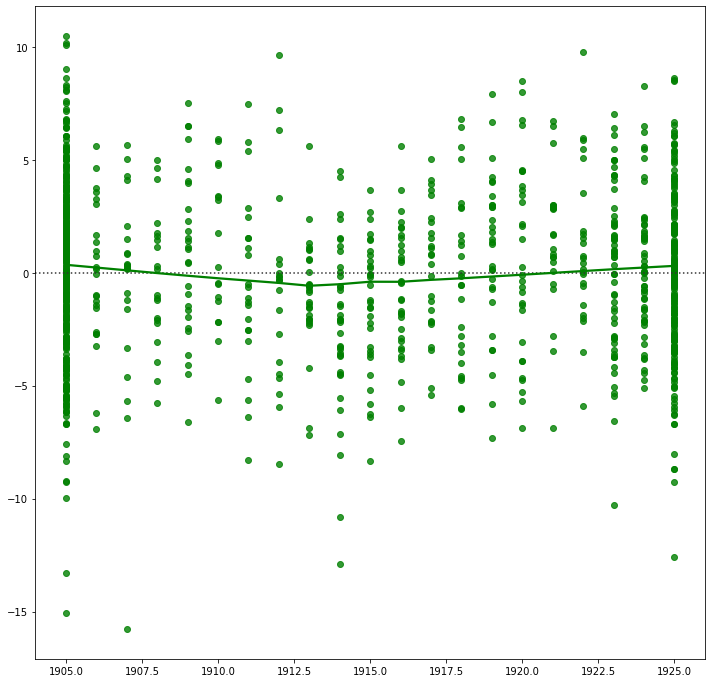

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
sns.residplot(y_test, results_linear, lowess=True, color="g")

In [20]:
df_coef_lin.tail(30)

,term,coef
45245,greatly,11.717423
45246,general,11.739623
45247,bis,11.780470
45248,tradition,11.813698
45249,eighteenth,11.919181
45250,paper,11.952075
45251,hardy,12.025416
45252,wilson,12.031915
45253,ford,12.034848
45254,perhaps,12.275805
